Training RMSE: 0.8583044920952043
Training R-squared: 0.8435546256307807
Testing RMSE: 0.32380969226999967
Testing R-squared: 0.9709541214969967


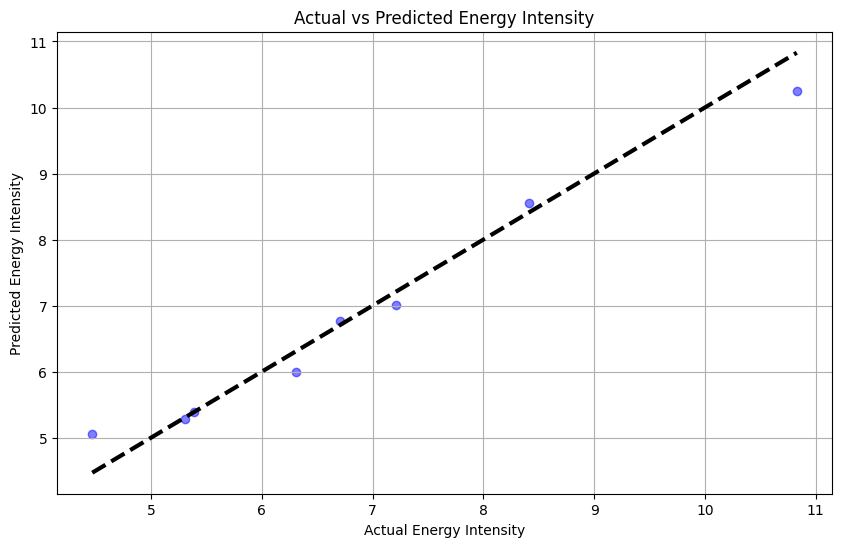

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

countries = ['China', 'United States', 'India', 'Japan', 'Germany']

df_filtered = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2019)].copy()

df_filtered = df_filtered.dropna()

y = df_filtered['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

X = df_filtered[['Primary energy consumption per capita (kWh/person)',
                'gdp_growth',
                'gdp_per_capita',
                'Value_co2_emissions_kt_by_country',
                'Renewables (% equivalent primary energy)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R-squared: {test_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Energy Intensity')
plt.ylabel('Predicted Energy Intensity')
plt.title(f'Actual vs Predicted Energy Intensity')
plt.grid(True)
plt.show()


ADF Statistic: 1.542073370002847
p-value: 0.9976729528516517
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-42.117, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-41.494, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-44.236, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19.563, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.600 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  25.118
Date:                Fri, 06 Sep 2024   AIC                            -44.236

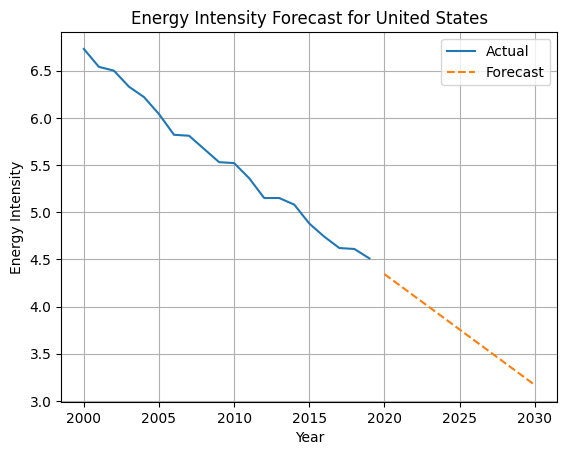

In [3]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df = pd.read_csv('data/global-data-on-sustainable-energy.csv')
country = 'United States'
country_data = df[(df['Entity'] == country) & (df['Year'] >= 2000) & (df['Year'] <= 2019)].copy()
y = country_data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].dropna().values

adf_test = adfuller(y)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

model = auto_arima(y, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False,
                trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print(model.summary())

forecast = model.predict(n_periods=11)

plt.plot(np.arange(2000, 2020), y, label='Actual')
plt.plot(np.arange(2020, 2031), forecast, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Energy Intensity')
plt.title(f'Energy Intensity Forecast for {country}')
plt.legend()
plt.grid(True)
plt.show()


RMSE on historical data: 0.08526021407847179
R-squared on historical data: 0.9779189511104256


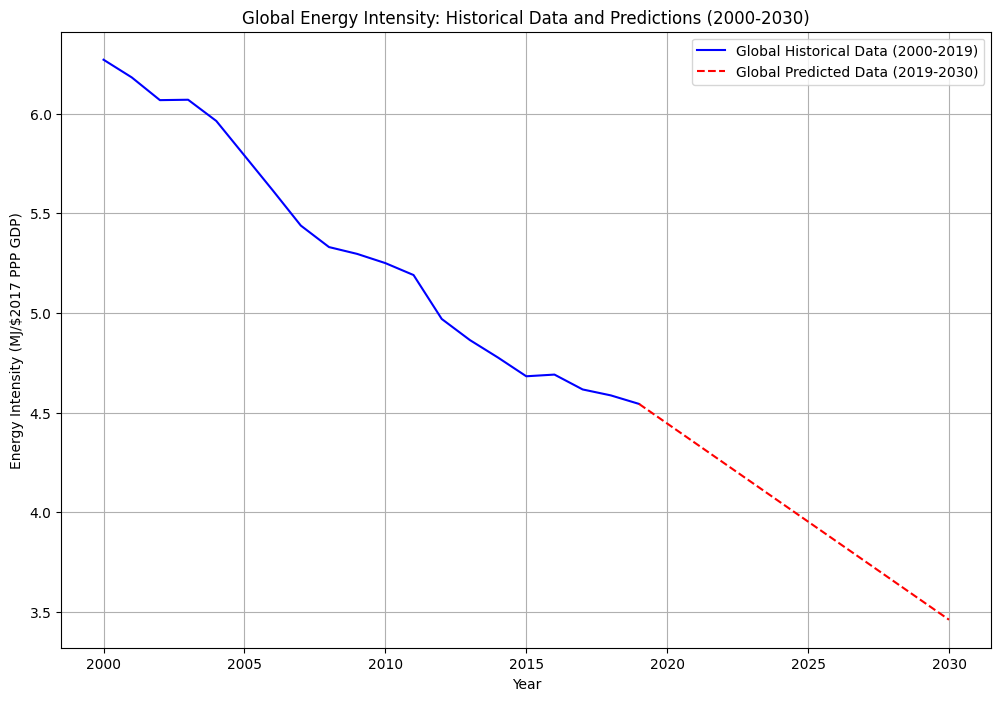

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('global-data-on-sustainable-energy.csv')

df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean())

df_global = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)].groupby('Year')['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean().reset_index()

X = df_global[['Year']]  
y = df_global['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(2019, 2031)})
y_pred_future = model.predict(future_years)

last_actual_value = y.iloc[-1]
y_pred_future = y_pred_future - y_pred_future[0] + last_actual_value

y_pred_train = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
r2 = r2_score(y, y_pred_train)

print(f"RMSE on historical data: {rmse}")
print(f"R-squared on historical data: {r2}")

plt.figure(figsize=(12, 8))

plt.plot(df_global['Year'], y, label='Global Historical Data (2000-2019)', color='blue', linestyle='-')

plt.plot(future_years['Year'], y_pred_future, label='Global Predicted Data (2019-2030)', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.title('Global Energy Intensity: Historical Data and Predictions (2000-2030)')
plt.legend()
plt.grid(True)

plt.show()


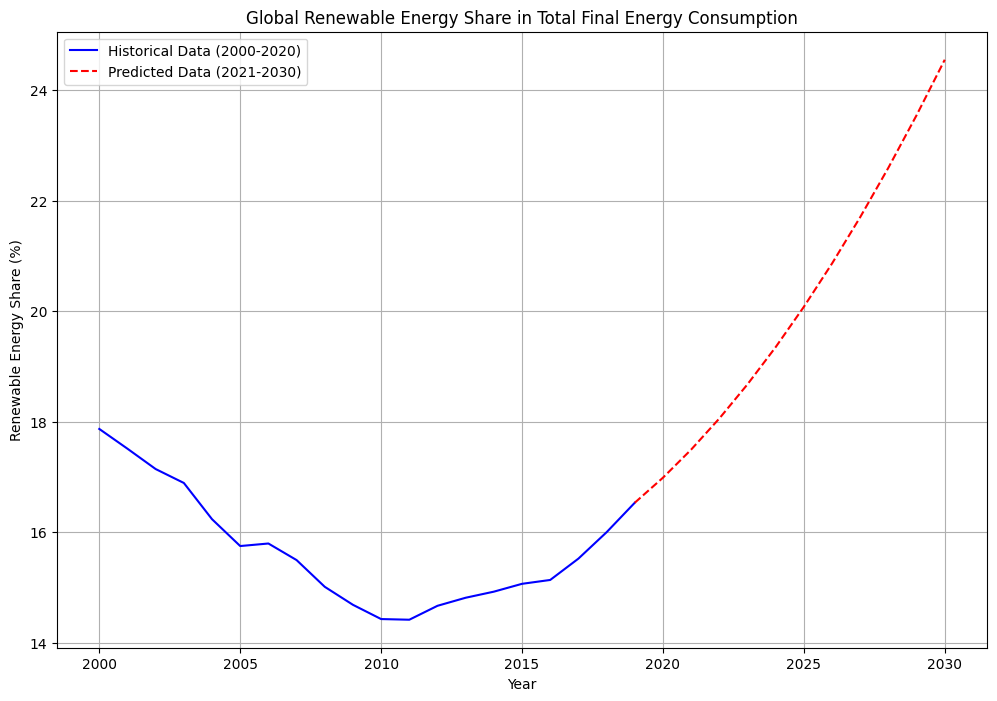

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('global-data-on-sustainable-energy.csv')

# List of countries to analyze
countries = ['China', 'United States', 'India', 'Japan', 'Germany']

# Filter the dataframe for the selected countries and years
df_five_countries = df[(df['Entity'].isin(countries)) & (df['Year'] >= 2000) & (df['Year'] <= 2019)].copy()

# Replace NaN values with the mean for 'Renewable energy share in the total final energy consumption (%)'
df_five_countries.loc[:, 'Renewable energy share in the total final energy consumption (%)'] = df_five_countries.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].transform(lambda x: x.fillna(x.mean()))

# Aggregate the data by year to get the global average renewable energy share
df_global = df_five_countries.groupby('Year')['Renewable energy share in the total final energy consumption (%)'].mean().reset_index()

# Prepare the data for modeling
X = df_global[['Year']].values  # Use the Year as the predictor
y = df_global['Renewable energy share in the total final energy consumption (%)'].values

# Create and train the polynomial regression model
degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X, y)

# Predict future values for Renewable energy share
future_years = np.arange(2019, 2031).reshape(-1, 1)  # Prediction for 2021-2030
y_pred = polynomial_model.predict(future_years)

# Adjust the prediction to start where the historical data ends
last_historical_value = y[-1]
y_pred = y_pred - y_pred[0] + last_historical_value

# Combine historical and predicted values into a single DataFrame
df_combined = pd.DataFrame({
    'Year': np.concatenate([df_global['Year'], future_years.flatten()]),
    'Renewable energy share in the total final energy consumption (%)': np.concatenate([y, y_pred])
})

# Save the combined DataFrame to a CSV file
df_combined.to_csv('global_renewable_energy_share_historical_predicted.csv', index=False)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(df_global['Year'], y, label='Historical Data (2000-2020)', color='blue', linestyle='-')
plt.plot(future_years.flatten(), y_pred, label='Predicted Data (2021-2030)', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.title('Global Renewable Energy Share in Total Final Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

